# ML

# Linear Regression

In [7]:
## import libraries
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [8]:
##step-1 load dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/sharmasaravanan/Machine_learning/master/Advertising.csv",index_col = 0)

In [9]:
dataset.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [10]:
x = dataset.loc[:,"TV":"newspaper"]
y = dataset["sales"]
x.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [11]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [12]:
##step-2 split dataset into train and test 
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=3)
xtrain.shape,xtest.shape,x.shape

((160, 3), (40, 3), (200, 3))

In [13]:
xtrain.head()

,TV,radio,newspaper
157,93.9,43.5,50.5
116,75.1,35.0,52.7
156,4.1,11.6,5.7
16,195.4,47.7,52.9
62,261.3,42.7,54.7


In [14]:
##step-3 defining an algorithm
model = LinearRegression()

In [15]:
##step-4 training
model.fit(xtrain,ytrain)

LinearRegression()

In [16]:
##step 5 and step 6 skipping for now...

In [17]:
##step-7 cross validation
ypred = model.predict(xtest)
ypred

array([16.29678619,  9.26361596, 19.45830733, 12.69896986,  7.35693629,
       10.13630662, 24.05157829,  8.87047296, 17.68702804, 13.89240253,
       12.32295085, 14.30587321, 15.55191065, 12.32493385, 12.35493367,
       11.90781853, 16.25923093, 17.52440317, 17.19918066, 21.73587709,
       18.3492105 ,  8.76977821, 10.57143038, 11.62914846,  6.56053195,
       13.49937253, 22.01597073, 13.57251413, 23.24678946, 11.49494839,
       16.83780927, 21.53825408, 10.32893524,  7.5361673 ,  9.85817806,
        8.11664682, 13.21200505, 10.26339272, 11.94972059,  9.66124841])

In [18]:
ytest

41     16.6
52     10.7
140    20.7
198    12.8
171     8.4
83     11.3
184    26.2
47     10.6
71     18.3
101    11.7
180    12.6
84     13.6
26     12.0
191    10.8
160    12.9
174    11.7
96     16.9
4      18.5
42     17.1
59     23.8
15     19.0
144    10.4
13      9.2
7      11.8
183     8.7
162    13.3
129    24.7
123    11.6
102    23.8
87     12.0
65     18.0
48     23.2
159     7.3
35      9.5
39     10.1
197     9.7
5      12.9
73      8.8
68     13.4
146    10.3
Name: sales, dtype: float64

In [19]:
error = np.sqrt(mean_squared_error(ypred,ytest))

In [20]:
error

1.4675768823681998

In [21]:
model.coef_

array([0.04552917, 0.18512403, 0.00119881])

In [22]:
model.intercept_

2.910980862854183

In [23]:
model.predict([[70,80,0]])

array([20.9079452])

In [24]:
## yhat = a + b1x1 + b2x2 + b3x3
yhat = model.intercept_

for bi,xi in zip(model.coef_,[50,50,50]):
    yhat += bi * xi

In [25]:
yhat

14.503581559429481

In [1]:
import pickle as pk

In [2]:
fileName = "AI-Connect-2021.pkl"

In [3]:
pk.dump(model,open(fileName,'wb'))

NameError: name 'model' is not defined

In [4]:
loadedModel = pk.load(open(fileName,'rb'))

In [5]:
loadedModel.predict([[70,80,0]])

array([20.9079452])

# Logistic Regression

In [4]:
##import lib
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
import re

from bs4 import BeautifulSoup
from nltk.corpus import stopwords

In [5]:
stop = stopwords.words('english')

In [6]:
## step-1 load dataset
dataset = pd.read_csv("D:/labeledTrainData.tsv",sep="\t")

In [7]:
dataset.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [8]:
def cleaning(raw):
    exam = BeautifulSoup(raw,"html.parser")
    #print(exam.get_text())
    #print()
    letter = re.sub("[^a-zA-Z]"," ",exam.get_text())
    #print(letter)
    #print()
    low = letter.lower()
    #print(low)
    #print()
    word = low.split()
    #print(word)
    #print()
    useful = [w for w in word if not w in stop]
    #print(useful)
    #print()
    use_sent = " ".join(useful)
    return use_sent

In [9]:
dataset['review'][0]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [10]:
cleaning(dataset['review'][0])

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [11]:
x = list(map(cleaning,dataset['review']))
y = dataset['sentiment']

In [12]:
## step-2 split dataset 
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=3)

In [13]:
len(xtrain),len(xtest)

(17500, 7500)

In [14]:
##step-2a vectorization
vect = CountVectorizer(min_df=3,ngram_range=(1,2))
xtrainvect = vect.fit_transform(xtrain)

In [15]:
xtrainvect

<17500x126248 sparse matrix of type '<class 'numpy.int64'>'
	with 2387006 stored elements in Compressed Sparse Row format>

In [16]:
##step-3 model defining
model1 = LogisticRegression(max_iter=200)

In [17]:
##step-4 training
model1.fit(xtrainvect,ytrain)

LogisticRegression(max_iter=200)

In [18]:
##step-7 cross validation
ypred = model1.predict(vect.transform(xtest))

In [32]:
ypred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [19]:
accuracy_score(ypred,ytest)

0.8853333333333333

In [20]:
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      3684
           1       0.89      0.88      0.89      3816

    accuracy                           0.89      7500
   macro avg       0.89      0.89      0.89      7500
weighted avg       0.89      0.89      0.89      7500



In [21]:
realTime = """Great plot, good execution, and great performances made this a memorable outing for me...

First of all, would love to see Vishnu Visal going forward selecting good stories like this. Indru Netru Naalai was a similar selection from him. Here too, he selected a proper psycho-thriller, which I haven't seen executed this well in recent years in Indian cinema. Making a 2hr 45 min long movie takes guts these days. It shows how confident the director was, with the content.

A lot of set-ups and pay-offs are there in the movie, which spring up every now and then making it interesting. The BG Score by Ghibran was great, kept me glued to the screen. The children performed so well in their respective roles, and so did Amala Paul, Kali Venkat, Nizhalgal Ravi, etc.. The twists were believable, and not the familiar one-twist saves all kindof mediocre stuff.

It tests your observation throwing stuff right in front of your eyes, and hiding them perfectly. Worth a watch..."""

In [22]:
model1.predict(vect.transform([cleaning(realTime)]))

array([1], dtype=int64)

In [23]:
model1.predict_proba(vect.transform([cleaning(realTime)]))

array([[9.34251557e-05, 9.99906575e-01]])

In [24]:
model1.classes_

array([0, 1], dtype=int64)

In [25]:
9.99906575e-01

0.999906575

In [26]:
import pickle as pk

In [27]:
fileName1 = ("movie review.pkl")

In [29]:
pk.dump(model1,open(fileName1,'wb'))

In [30]:
loadedModel1 = pk.load(open(fileName1,'rb'))

In [31]:
loadedModel1.predict(vect.transform([cleaning(realTime)]))

array([1], dtype=int64)

# apriori

In [14]:
import pandas as pd

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [15]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [16]:
dataset

[['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
 ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
 ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
 ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
 ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [17]:
te = TransactionEncoder()

In [18]:
preprocessedData = te.fit_transform(dataset)

In [19]:
preprocessedData

array([[False, False, False,  True, False,  True,  True,  True,  True,
        False,  True],
       [False, False,  True,  True, False,  True, False,  True,  True,
        False,  True],
       [ True, False, False,  True, False,  True,  True, False, False,
        False, False],
       [False,  True, False, False, False,  True,  True, False, False,
         True,  True],
       [False,  True, False,  True,  True,  True, False, False,  True,
        False, False]])

In [28]:
df = pd.DataFrame(preprocessedData,columns = te.columns_)

In [29]:
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [35]:
df1 = apriori(df,min_support=0.5,use_colnames=True)

In [36]:
df1

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Yogurt, Kidney Beans)"


# ECLAT (Equivalent Class Transformation)

In [1]:
import pandas as pd
import fim as fm


In [2]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [3]:
dataset

[['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
 ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
 ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
 ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
 ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [6]:
fm.eclat(dataset, target='s', supp=50, zmin=1, zmax=10, report='S')

[(('Eggs', 'Kidney Beans'), 80.0),
 (('Eggs',), 80.0),
 (('Onion', 'Kidney Beans', 'Eggs'), 60.0),
 (('Onion', 'Kidney Beans'), 60.0),
 (('Onion', 'Eggs'), 60.0),
 (('Onion',), 60.0),
 (('Milk', 'Kidney Beans'), 60.0),
 (('Milk',), 60.0),
 (('Yogurt', 'Kidney Beans'), 60.0),
 (('Yogurt',), 60.0)]

# K-Means

In [1]:
import pandas as pd

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv("https://raw.githubusercontent.com/sharmasaravanan/Machine_learning/master/train.csv")

In [3]:
ds.head()

,class,petal_length,petal_width,sepal_length,sepal_width
0,Iris-virginica,5.5,1.8,6.4,3.1
1,Iris-virginica,5.9,2.3,6.8,3.2
2,Iris-virginica,5.4,2.3,6.2,3.4
3,Iris-virginica,4.8,1.8,6.0,3.0
4,Iris-virginica,5.1,2.3,6.9,3.1


In [4]:
ds.shape

(105, 5)

In [29]:
ds.groupby("class").count()

,petal_length,petal_width,sepal_length,sepal_width
class,,,,
Iris-setosa,35,35,35,35
Iris-versicolor,35,35,35,35
Iris-virginica,35,35,35,35


In [6]:
x = ds.drop(columns="class")

In [7]:
x.head()

,petal_length,petal_width,sepal_length,sepal_width
0,5.5,1.8,6.4,3.1
1,5.9,2.3,6.8,3.2
2,5.4,2.3,6.2,3.4
3,4.8,1.8,6.0,3.0
4,5.1,2.3,6.9,3.1


In [24]:
model = KMeans(n_clusters=3)

In [25]:
model.fit(x)

KMeans(n_clusters=3)

In [26]:
model.cluster_centers_

array([[5.58125   , 2.003125  , 6.74375   , 3.0125    ],
       [1.47714286, 0.24571429, 5.02857143, 3.46571429],
       [4.29736842, 1.39210526, 5.8       , 2.71842105]])

In [27]:
model.labels_

array([0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [30]:
ds['predicted'] = model.labels_

In [31]:
ds

,class,petal_length,petal_width,sepal_length,sepal_width,predicted
0,Iris-virginica,5.5,1.8,6.4,3.1,0
1,Iris-virginica,5.9,2.3,6.8,3.2,0
2,Iris-virginica,5.4,2.3,6.2,3.4,0
3,Iris-virginica,4.8,1.8,6.0,3.0,2
4,Iris-virginica,5.1,2.3,6.9,3.1,0
...,...,...,...,...,...,...
100,Iris-setosa,1.5,0.2,5.0,3.4,1
101,Iris-setosa,1.7,0.3,5.7,3.8,1
102,Iris-setosa,1.3,0.4,5.4,3.9,1
103,Iris-setosa,1.9,0.4,5.1,3.8,1


In [32]:
dict.fromkeys(ds['class'].unique())

{'Iris-virginica': None, 'Iris-versicolor': None, 'Iris-setosa': None}

In [33]:
temp = {2:'Iris-virginica', 0:'Iris-versicolor', 1:'Iris-setosa'}

In [34]:
ds['predicted_class'] = ds['predicted'].map(temp)

In [35]:
ds.drop(columns='predicted',inplace=True)

In [36]:
ds.head()

,class,petal_length,petal_width,sepal_length,sepal_width,predicted_class
0,Iris-virginica,5.5,1.8,6.4,3.1,Iris-versicolor
1,Iris-virginica,5.9,2.3,6.8,3.2,Iris-versicolor
2,Iris-virginica,5.4,2.3,6.2,3.4,Iris-versicolor
3,Iris-virginica,4.8,1.8,6.0,3.0,Iris-virginica
4,Iris-virginica,5.1,2.3,6.9,3.1,Iris-versicolor


In [106]:
ds.groupby('predicted_class').count()

,class,petal_length,petal_width,sepal_length,sepal_width
predicted_class,,,,,
Iris-setosa,35,35,35,35,35
Iris-versicolor,38,38,38,38,38
Iris-virginica,32,32,32,32,32


In [108]:
pred = model.predict([[3.6,1.5,5.6,4.7]])

In [109]:
pred[0]

0

In [114]:
temp[pred[0]]

'Iris-versicolor'

## Elbow method

In [111]:
inertia = []
k = []
for i in range(1,106):
    model = KMeans(n_clusters=i)
    model.fit(x)
    inertia.append(model.inertia_)
    k.append(i)

c:\users\azeem\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (103) found smaller than n_clusters (104). Possibly due to duplicate points in X.
  """
c:\users\azeem\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (103) found smaller than n_clusters (105). Possibly due to duplicate points in X.
  """


In [112]:
KMeans?

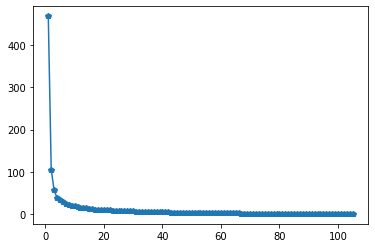

In [117]:
plt.plot(k,inertia,marker = 'p')
plt.show()

# KNN

In [118]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [125]:
ds1 = pd.read_csv("https://raw.githubusercontent.com/sharmasaravanan/Machine_learning/master/train.csv")

In [126]:
ds1.head()

,class,petal_length,petal_width,sepal_length,sepal_width
0,Iris-virginica,5.5,1.8,6.4,3.1
1,Iris-virginica,5.9,2.3,6.8,3.2
2,Iris-virginica,5.4,2.3,6.2,3.4
3,Iris-virginica,4.8,1.8,6.0,3.0
4,Iris-virginica,5.1,2.3,6.9,3.1


In [127]:
ds1.shape

(105, 5)

In [128]:
x = ds1.drop(columns='class')
y = ds1['class']

In [129]:
x.head()

,petal_length,petal_width,sepal_length,sepal_width
0,5.5,1.8,6.4,3.1
1,5.9,2.3,6.8,3.2
2,5.4,2.3,6.2,3.4
3,4.8,1.8,6.0,3.0
4,5.1,2.3,6.9,3.1


In [131]:
model = KNeighborsClassifier(n_neighbors=3)

In [132]:
model.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

In [133]:
model.predict([[3.6,1.5,5.6,4.7]])

array(['Iris-versicolor'], dtype=object)

In [134]:
model.predict_proba([[3.6,1.5,5.6,4.7]])

array([[0., 1., 0.]])

In [135]:
model.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Hierarchial clustering

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [38]:
x=np.array([[1,1],[1.1,1.1],[3,3],[4,4],[3,3.5],[3.5,4]])

In [39]:
linkageMatrix = linkage?

In [40]:
linkageMatrix = linkage(x,method='single')

In [41]:
linkageMatrix

array([[0.        , 1.        , 0.14142136, 2.        ],
       [2.        , 4.        , 0.5       , 2.        ],
       [3.        , 5.        , 0.5       , 2.        ],
       [7.        , 8.        , 0.70710678, 4.        ],
       [6.        , 9.        , 2.68700577, 6.        ]])

In [42]:
dendrogram?

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [30.0, 30.0, 50.0, 50.0],
  [10.0, 10.0, 40.0, 40.0]],
 'dcoord': [[0.0, 0.14142135623730964, 0.14142135623730964, 0.0],
  [0.0, 0.5, 0.5, 0.0],
  [0.0, 0.5, 0.5, 0.0],
  [0.5, 0.7071067811865476, 0.7071067811865476, 0.5],
  [0.14142135623730964,
   2.6870057685088806,
   2.6870057685088806,
   0.7071067811865476]],
 'ivl': ['0', '1', '2', '4', '3', '5'],
 'leaves': [0, 1, 2, 4, 3, 5],
 'color_list': ['C1', 'C2', 'C2', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C2', 'C2', 'C2', 'C2']}

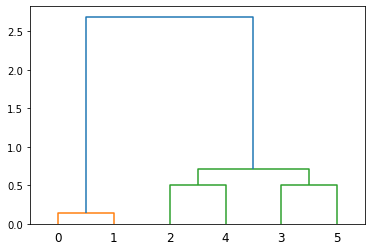

In [147]:
dendrogram(linkageMatrix,truncate_mode='lastp')

## KMeans plotting...

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

x = np.array([[1,2],[5,8],[1.5,1.8],[8,8],[1,0.6],[9,11]])
kmeans = KMeans(n_clusters = 2)
kmeans.fit(x)


KMeans(n_clusters=2)

In [5]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)
print(labels)

[[1.16666667 1.46666667]
 [7.33333333 9.        ]]
[0 1 0 1 0 1]


In [6]:
colors = ["g.","r.","c.","y."]

In [36]:
centroids[:,1]

array([1.46666667, 9.        ])

coordinate: [1. 2.] labels: 0
coordinate: [5. 8.] labels: 1
coordinate: [1.5 1.8] labels: 0
coordinate: [8. 8.] labels: 1
coordinate: [1.  0.6] labels: 0
coordinate: [ 9. 11.] labels: 1


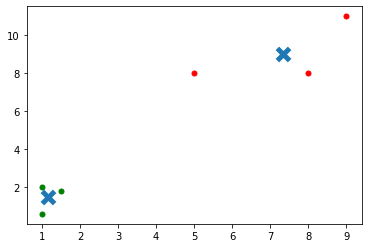

In [35]:
for i in range (len(x)):
    print("coordinate:",x[i],"labels:",labels[i])
    plt.plot(x[i][0],x[i][1],colors[labels[i]], markersize = 10)
    
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 150, linewidths=5, zorder=10)
plt.show()
                                    
                                

# naive bayes

In [48]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB

In [38]:
le = LabelEncoder()

In [40]:
example = ["sunny","sunny","overcast","rainy","rainy","rainy","overcast","sunny","sunny","rainy"]

In [41]:
le.fit_transform(example)

array([2, 2, 0, 1, 1, 1, 0, 2, 2, 1], dtype=int64)

In [49]:
dataset = pd.read_csv("D:/github/Machine_learning-master/weather.csv")

In [50]:
dataset

,outlook,temperature,humidity,wind,play
0,2,2,1,0,no
1,2,2,1,1,no
2,1,2,1,0,yes
3,0,1,1,0,yes
4,0,0,0,0,yes
5,0,0,0,1,no
6,1,0,0,1,yes
7,2,1,1,0,no
8,2,0,0,0,yes
9,0,1,0,0,yes


In [51]:
x = dataset.loc[:,"outlook":"wind"]
y = dataset['play']

In [52]:
x

,outlook,temperature,humidity,wind
0,2,2,1,0
1,2,2,1,1
2,1,2,1,0
3,0,1,1,0
4,0,0,0,0
5,0,0,0,1
6,1,0,0,1
7,2,1,1,0
8,2,0,0,0
9,0,1,0,0


In [53]:
model = GaussianNB()

In [54]:
model.fit(x,y)

GaussianNB()

In [55]:
#test case: sunny, mild, high, true
testData = [2,1,1,1]

In [56]:
model.predict([testData])

array(['no'], dtype='<U3')

In [57]:
model.predict([testData])[0]

'no'

In [58]:
model.predict_proba([testData])

array([[0.82612248, 0.17387752]])

In [59]:
model.classes_

array(['no', 'yes'], dtype='<U3')

# Decision Tree

In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [61]:
ds = pd.read_csv("D:/github/Machine_learning-master/weather.csv")

In [62]:
ds

,outlook,temperature,humidity,wind,play
0,2,2,1,0,no
1,2,2,1,1,no
2,1,2,1,0,yes
3,0,1,1,0,yes
4,0,0,0,0,yes
5,0,0,0,1,no
6,1,0,0,1,yes
7,2,1,1,0,no
8,2,0,0,0,yes
9,0,1,0,0,yes


In [63]:
x = ds.loc[:,"outlook":"wind"]
y = ds["play"]

In [65]:
model = DecisionTreeClassifier(criterion='entropy')

In [66]:
model.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

In [67]:
## test case: sunny,mild,high,true
testValue = [2,1,1,1]

In [69]:
model.predict([testValue])

array(['no'], dtype=object)

In [73]:
model.predict_proba([testValue])

array([[1., 0.]])

In [74]:
model.classes_

array(['no', 'yes'], dtype=object)

# Random Forest 

## single image processing

In [1]:
import cv2
import sys

In [2]:
filePath = "Pictures/girls.jpg"

In [3]:
image = cv2.imread(filePath)

In [4]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [5]:
edge = cv2.Canny(image,200,300)

In [6]:
img_copy = image.copy()

In [7]:
rectangle = cv2.rectangle(img_copy,pt1 = (140,92), pt2 = (620,240),color = (255,0,0),thickness = 5)

In [8]:
text_image = cv2.putText(img_copy,"these are girls",(250,120),cv2.FONT_ITALIC,0.8,color = (100,0,0),thickness = 5)

In [9]:
cropped_image = image[140:600,100:235]

In [10]:
resized_image = cv2.resize(image,(20,20))

In [ ]:
cv2.imshow("original image", image)
cv2.imshow("gray image", gray)
cv2.imshow("edge image", edge)
cv2.imshow("rectangle image", rectangle)
cv2.imshow("text image", text_image)
cv2.imshow("cropped image", cropped_image)
cv2.imshow("resized image", resized_image)

cv2.waitKey(0)

## multiple image processing(for imbalanced dataset)

In [3]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.transform import resize

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [47]:
data_path = "F:/animal_face/Image/"
os.listdir(data_path)

['BearHead',
 'CatHead',
 'ChickenHead',
 'CowHead',
 'DeerHead',
 'DogHead',
 'DuckHead',
 'EagleHead',
 'ElephantHead',
 'HumanHead',
 'LionHead',
 'MonkeyHead',
 'MouseHead',
 'Natural',
 'PandaHead',
 'PigeonHead',
 'RabbitHead',
 'SheepHead',
 'TigerHead',
 'WolfHead']

In [48]:
def resize_all(src,width=150,height=150):
    data = dict()
    data['label'] = []
    data['data'] = []
    for subdir in os.listdir(src):
        current_path = os.path.join(src,subdir)
        for file in os.listdir(current_path):
            if file[-3:] in {"jpg",'png'}:
                image = cv2.imread(os.path.join(current_path,file),0)
                image = resize(image,(width,height))
                data['label'].append(subdir[:-4])
                data['data'].append(np.asarray(image).flatten())
    return data

In [49]:
data = resize_all(src=data_path)
data

{'label': ['Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
 

In [50]:
from collections import Counter

print("number of sample",len(data['data']))
print("keys",data.keys())
print("image shape",data['data'][0].shape)
print("labels",np.unique(data['label']))

number of sample 2282
keys dict_keys(['label', 'data'])
image shape (22500,)
labels ['Bear' 'Cat' 'Chicken' 'Cow' 'Deer' 'Dog' 'Duck' 'Eagle' 'Elephant'
 'Human' 'Lion' 'Monkey' 'Mouse' 'Nat' 'Panda' 'Pigeon' 'Rabbit' 'Sheep'
 'Tiger' 'Wolf']


In [51]:
Counter(data['label'])

Counter({'Bear': 101,
         'Cat': 159,
         'Chicken': 100,
         'Cow': 101,
         'Deer': 101,
         'Dog': 389,
         'Duck': 102,
         'Eagle': 97,
         'Elephant': 100,
         'Human': 100,
         'Lion': 97,
         'Monkey': 100,
         'Mouse': 100,
         'Nat': 8,
         'Panda': 117,
         'Pigeon': 98,
         'Rabbit': 100,
         'Sheep': 100,
         'Tiger': 112,
         'Wolf': 100})

In [15]:
X = np.array(data['data'])
Y = np.array(data['label'])

In [17]:
X.shape

(2282, 22500)

In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=3)

In [19]:
xtrain.shape

(1825, 22500)

In [24]:
model = RandomForestClassifier(n_estimators=300)

In [25]:
model.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=300)

In [26]:
ypred = model.predict(xtest)

In [27]:
accuracy_score(ypred,ytest)

0.43544857768052514

## multiple image processing (for balanced dataset)

In [39]:
## function for considering only selected number of pictures...

In [61]:
import shutil
import os

def prune(dataSet,threshold=100):
    for subdirs,dirs,files in os.walk(dataSet):
        if subdirs == dataSet:
            continue
        number_img = 0
        for fName in files:
            (imageClass,imageName) = (os.path.basename(subdirs),fName)
            if any (imageName.lower().endswith("."+ext)for ext in ["jpg","png"]):
                number_img +=1
        if number_img < threshold:
            print("Removing {}",format(subdirs))
            shutil.rmtree(subdirs)

In [62]:
prune(dataSet=data_path)

Removing {} F:/animal_face/Image/Natural


In [68]:
def resize_all(src,width=150,height=150):
    data = dict()
    data['label'] = []
    data['data'] = []
    temp = {}
    for subdir in os.listdir(src):
        current_path = os.path.join(src,subdir)
        for file in os.listdir(current_path):
            if file[-3:] in {"jpg",'png'}:
                image = cv2.imread(os.path.join(current_path,file),0)
                image = resize(image,(width,height))
                label = subdir[:-4]
                if label in temp:
                    temp[label] += 1
                else:
                    temp[label] = 1
                if temp[label] <100:
                    data['label'].append(label)
                    data['data'].append(np.asarray(image).flatten())
    return data

In [69]:
data_file = resize_all(src=data_path)

In [70]:
data_file

{'label': ['Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
 

In [71]:
from collections import Counter

print("number of sample",len(data_file["data"]))
print("keys",data_file.keys())
print("shape",data_file['data'][0].shape)
print("labels",np.unique(data_file['label']))

number of sample 1876
keys dict_keys(['label', 'data'])
shape (22500,)
labels ['Bear' 'Cat' 'Chicken' 'Cow' 'Deer' 'Dog' 'Duck' 'Eagle' 'Elephant'
 'Human' 'Lion' 'Monkey' 'Mouse' 'Panda' 'Pigeon' 'Rabbit' 'Sheep' 'Tiger'
 'Wolf']


In [72]:
Counter(data_file['label'])

Counter({'Bear': 99,
         'Cat': 99,
         'Chicken': 99,
         'Cow': 99,
         'Deer': 99,
         'Dog': 99,
         'Duck': 99,
         'Eagle': 97,
         'Elephant': 99,
         'Human': 99,
         'Lion': 97,
         'Monkey': 99,
         'Mouse': 99,
         'Panda': 99,
         'Pigeon': 98,
         'Rabbit': 99,
         'Sheep': 99,
         'Tiger': 99,
         'Wolf': 99})

In [73]:
X = np.array(data_file['data'])
Y = np.array(data_file['label'])

In [74]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [75]:
x_train.shape

(1500, 22500)

In [80]:
model1 = RandomForestClassifier(n_estimators=500)

In [81]:
model1.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500)

In [82]:
y_pred = model1.predict(x_test)

In [83]:
accuracy_score(y_pred,y_test)

0.449468085106383

In [85]:
image = cv2.imread("Pictures/tiger.jpg",0)
image = resize(image,(150,150))

In [89]:
cv2.imshow("tiger",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [92]:
np.array(image.flatten())

array([0.18865386, 0.17032092, 0.14644837, ..., 0.74534641, 0.72689529,
       0.73133333])

In [94]:
model1.predict([np.array(image).flatten()])

array(['Mouse'], dtype='<U8')

In [95]:
model1.predict_proba([np.array(image).flatten()])

array([[0.008, 0.09 , 0.076, 0.032, 0.064, 0.074, 0.072, 0.018, 0.042,
        0.068, 0.074, 0.048, 0.136, 0.   , 0.034, 0.03 , 0.024, 0.068,
        0.042]])

In [96]:
model1.classes_

array(['Bear', 'Cat', 'Chicken', 'Cow', 'Deer', 'Dog', 'Duck', 'Eagle',
       'Elephant', 'Human', 'Lion', 'Monkey', 'Mouse', 'Panda', 'Pigeon',
       'Rabbit', 'Sheep', 'Tiger', 'Wolf'], dtype='<U8')

# svm

In [71]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.transform import resize

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [72]:
data_path = "F:/animal_face/Image/"
os.listdir(data_path)

['BearHead',
 'CatHead',
 'ChickenHead',
 'CowHead',
 'DeerHead',
 'DogHead',
 'DuckHead',
 'EagleHead',
 'ElephantHead',
 'HumanHead',
 'LionHead',
 'MonkeyHead',
 'MouseHead',
 'PandaHead',
 'PigeonHead',
 'RabbitHead',
 'SheepHead',
 'TigerHead',
 'WolfHead']

In [15]:
def resize_all(src,width=150,height=150):
    data = dict()
    data['label'] = []
    data['data'] = []
    for subdir in os.listdir(src):
        current_path = os.path.join(src,subdir)
        for file in os.listdir(current_path):
            if file[-3:] in {"jpg",'png'}:
                image = cv2.imread(os.path.join(current_path,file),0)
                image = resize(image,(width,height))
                data['label'].append(subdir[:-4])
                data['data'].append(np.asarray(image).flatten())
    return data

In [16]:
data = resize_all(src=data_path)
data

{'label': ['Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
  'Bear',
 

In [75]:
from collections import Counter

print("number of samples",len(data['data']))
print("keys",data.keys())
print("image shape",data['data'][0].shape)
print("label",np.unique(data['label']))

number of samples 2274
keys dict_keys(['label', 'data'])
image shape (22500,)
label ['Bear' 'Cat' 'Chicken' 'Cow' 'Deer' 'Dog' 'Duck' 'Eagle' 'Elephant'
 'Human' 'Lion' 'Monkey' 'Mouse' 'Panda' 'Pigeon' 'Rabbit' 'Sheep' 'Tiger'
 'Wolf']


In [76]:
Counter(data['label'])

Counter({'Bear': 101,
         'Cat': 159,
         'Chicken': 100,
         'Cow': 101,
         'Deer': 101,
         'Dog': 389,
         'Duck': 102,
         'Eagle': 97,
         'Elephant': 100,
         'Human': 100,
         'Lion': 97,
         'Monkey': 100,
         'Mouse': 100,
         'Panda': 117,
         'Pigeon': 98,
         'Rabbit': 100,
         'Sheep': 100,
         'Tiger': 112,
         'Wolf': 100})

In [77]:
X = np.array(data['data'])
Y = np.array(data['label'])

In [78]:
X.shape

(2274, 22500)

In [79]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [80]:
model = SVC(C=10,probability=True)

In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
accuracy_score(y_pred,y_test)

In [21]:
test_image =cv2.imread("Pictures/tiger.jpg",0)
test_image = resize(test_image,(150,150))

In [25]:
np.array([np.array(test_image).flatten()]).shape

(1, 22500)

In [27]:
model.predict([np.array(test_image).flatten()])

array(['Dog'], dtype='<U8')

In [28]:
model.predict_proba([np.array(test_image).flatten()])

AttributeError: predict_proba is not available when  probability=False

In [ ]:
model.classes_

## svm and pca

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.transform import resize

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [2]:
data_path = "F:/animal_face/Image/"
os.listdir(data_path)

['BearHead',
 'CatHead',
 'ChickenHead',
 'CowHead',
 'DeerHead',
 'DogHead',
 'DuckHead',
 'EagleHead',
 'ElephantHead',
 'HumanHead',
 'LionHead',
 'MonkeyHead',
 'MouseHead',
 'PandaHead',
 'PigeonHead',
 'RabbitHead',
 'SheepHead',
 'TigerHead',
 'WolfHead']

In [6]:
def resize_all(src,width=150,height=150):
    data = dict()
    data['label'] = []
    data['data'] = []
    temp={}
    for subdir in os.listdir(src):
        current_path = os.path.join(src,subdir)
        for file in os.listdir(current_path):
            if file[-3:] in {"jpg","png"}:
                image = cv2.imread(os.path.join(current_path,file),0)
                image = resize(image,(width,height))
                label = subdir[:-4]
                if label in temp:
                    temp[label] += 1
                else:
                    temp[label] = 1
                if temp[label] < 100:
                    data['label'].append(label)
                    data['data'].append(np.asarray(image).flatten())
                
    return data

In [7]:
data = resize_all(src=data_path)

In [8]:
from collections import Counter

print("number of samples",len(data['data']))
print("keys",data.keys())
print("image shape",data['data'][0].shape)
print("labels",np.unique(data['label']))

number of samples 1876
keys dict_keys(['label', 'data'])
image shape (22500,)
labels ['Bear' 'Cat' 'Chicken' 'Cow' 'Deer' 'Dog' 'Duck' 'Eagle' 'Elephant'
 'Human' 'Lion' 'Monkey' 'Mouse' 'Panda' 'Pigeon' 'Rabbit' 'Sheep' 'Tiger'
 'Wolf']


In [9]:
Counter(data['label'])

Counter({'Bear': 99,
         'Cat': 99,
         'Chicken': 99,
         'Cow': 99,
         'Deer': 99,
         'Dog': 99,
         'Duck': 99,
         'Eagle': 97,
         'Elephant': 99,
         'Human': 99,
         'Lion': 97,
         'Monkey': 99,
         'Mouse': 99,
         'Panda': 99,
         'Pigeon': 98,
         'Rabbit': 99,
         'Sheep': 99,
         'Tiger': 99,
         'Wolf': 99})

In [15]:
X = np.array(data['data'])
Y = np.array(data['label'])

In [16]:
X.shape

(2274, 22500)

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [18]:
x_train.shape

(1819, 22500)

In [19]:
## pca...
n_components = 100
pca = PCA(n_components=n_components,whiten=True).fit(x_train)

In [20]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [21]:
model = SVC(probability=True)

In [22]:
model.fit(x_train_pca,y_train)

SVC(probability=True)

In [23]:
ypred = model.predict(x_test_pca)

In [24]:
accuracy_score(ypred,y_test)

0.41098901098901097

In [25]:
test_image = cv2.imread("Pictures/tiger2.jpg",0)
test_image = resize(test_image,(150,150))

In [26]:
np.array([np.array(test_image).flatten()]).shape

(1, 22500)

In [27]:
model.predict(pca.transform([np.array(test_image).flatten()]))

array(['Dog'], dtype='<U8')

In [28]:
model.predict_proba(pca.transform([np.array(test_image).flatten()]))

array([[0.04661552, 0.2498608 , 0.05009751, 0.13721191, 0.02702813,
        0.14813905, 0.09338292, 0.02644308, 0.0059434 , 0.01022828,
        0.03338631, 0.04376242, 0.02471318, 0.00276287, 0.02864534,
        0.03218633, 0.0110456 , 0.00617968, 0.02236763]])

In [29]:
model.classes_

array(['Bear', 'Cat', 'Chicken', 'Cow', 'Deer', 'Dog', 'Duck', 'Eagle',
       'Elephant', 'Human', 'Lion', 'Monkey', 'Mouse', 'Panda', 'Pigeon',
       'Rabbit', 'Sheep', 'Tiger', 'Wolf'], dtype='<U8')

In [4]:
import pickle as pk

In [5]:
file_name = ("image Recognition.pkl")

In [31]:
pk.dump(model,open(file_name,'wb'))

In [32]:
loadedModel = pk.load(open(file_name,'rb'))

In [34]:
pca_test_image = pca.transform([np.array(test_image).flatten()])

In [35]:
loadedModel.predict(pca_test_image)

array(['Dog'], dtype='<U8')

In [36]:
loadedModel.predict_proba(pca_test_image)

array([[0.04661552, 0.2498608 , 0.05009751, 0.13721191, 0.02702813,
        0.14813905, 0.09338292, 0.02644308, 0.0059434 , 0.01022828,
        0.03338631, 0.04376242, 0.02471318, 0.00276287, 0.02864534,
        0.03218633, 0.0110456 , 0.00617968, 0.02236763]])

In [37]:
loadedModel.classes_

array(['Bear', 'Cat', 'Chicken', 'Cow', 'Deer', 'Dog', 'Duck', 'Eagle',
       'Elephant', 'Human', 'Lion', 'Monkey', 'Mouse', 'Panda', 'Pigeon',
       'Rabbit', 'Sheep', 'Tiger', 'Wolf'], dtype='<U8')

In [4]:
temp = {"apple":1,"mango":2,"orange":3,"papaya":4}

In [7]:
dictionary = {y:x for x,y in temp.items()}
    

In [8]:
dictionary

{1: 'apple', 2: 'mango', 3: 'orange', 4: 'papaya'}

# DL

## VNN/MLP

In [52]:
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import SGD,Adam,RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from skimage.io import imread
from skimage.transform import resize

from sklearn.model_selection import train_test_split

In [2]:
data_path = "F:/animal_face/Image/"
os.listdir(data_path)

['BearHead',
 'CatHead',
 'ChickenHead',
 'CowHead',
 'DeerHead',
 'DogHead',
 'DuckHead',
 'EagleHead',
 'ElephantHead',
 'HumanHead',
 'LionHead',
 'MonkeyHead',
 'MouseHead',
 'PandaHead',
 'PigeonHead',
 'RabbitHead',
 'SheepHead',
 'TigerHead',
 'WolfHead']

In [5]:
labelCode = {'Rabbit': 0,
 'Tiger': 1,
 'Cat': 2,
 'Wolf': 3,
 'Panda': 4,
 'Elephant': 5,
 'Sheep': 6,
 'Eagle': 7,
 'Mouse': 8,
 'Pigeon': 9,
 'Bear': 10,
 'Deer': 11,
 'Cow': 12,
 'Dog': 13,
 'Chicken': 14,
 'Monkey': 15,
 'Duck': 16,
 'Human': 17,
 'Lion': 18}

In [6]:
def resize_all(src,width=150,height=150):
    data = dict()
    data['label'] = []
    data['data'] = []
    temp={}
    for subdir in os.listdir(src):
        current_path = os.path.join(src,subdir)
        for file in os.listdir(current_path):
            if file[-3:] in {"jpg","png"}:
                image = cv2.imread(os.path.join(current_path,file),0)
                image = resize(image,(width,height))
                label = subdir[:-4]
                if label in temp:
                    temp[label] += 1
                else:
                    temp[label] = 1
                if temp[label] < 100:
                    data['label'].append(labelCode[label])
                    data['data'].append(np.asarray(image).flatten())
                
    return data

In [7]:
data = resize_all(src=data_path)

In [23]:
y_train[0]

'Mouse'

In [8]:
x = np.array(data['data'])
y = np.array(data['label'])

In [13]:
dict.fromkeys(list(set(Y)))

{'Wolf': None,
 'Duck': None,
 'Human': None,
 'Tiger': None,
 'Cat': None,
 'Chicken': None,
 'Cow': None,
 'Pigeon': None,
 'Panda': None,
 'Mouse': None,
 'Monkey': None,
 'Eagle': None,
 'Lion': None,
 'Elephant': None,
 'Rabbit': None,
 'Bear': None,
 'Sheep': None,
 'Dog': None,
 'Deer': None}

In [9]:
x.shape

(1876, 22500)

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [19]:
y_train

array([ 8, 15,  2, ...,  6,  8,  1])

In [11]:
codeLabel = dict((v,k)for k,v in labelCode.items())

In [12]:
codeLabel

{0: 'Rabbit',
 1: 'Tiger',
 2: 'Cat',
 3: 'Wolf',
 4: 'Panda',
 5: 'Elephant',
 6: 'Sheep',
 7: 'Eagle',
 8: 'Mouse',
 9: 'Pigeon',
 10: 'Bear',
 11: 'Deer',
 12: 'Cow',
 13: 'Dog',
 14: 'Chicken',
 15: 'Monkey',
 16: 'Duck',
 17: 'Human',
 18: 'Lion'}

In [14]:
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')

#X_train /= 255(comment out because resize has already been done...)
#X_test /= 255(comment out because resize has already been done...)

#print(X_train.shape, 'train samples')
#print(X_test.shape, 'test samples')

Y_train = to_categorical(y_train, len(set(y)))
Y_test = to_categorical(y_test, len(set(y)))

In [24]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.], dtype=float32)

In [25]:
y_train[0]

8

In [26]:
y[0]

10

In [27]:
x_train.shape

(1500, 22500)

In [41]:
model = Sequential()
model.add(Dense(128,input_shape =(22500,)))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(len(set(y))))
model.add(Activation('softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer=SGD(),metrics= ['accuracy'])

In [55]:
## with droputs...
model.add(Dense(64,input_shape=(22500,)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(len(set(y))))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

hiddenLayer -> Activation -> ReLu(CNN,MLP), sigmoid(RNN)

outputLayer -> Activation -> Linear(Regression), sigmoid(Bi-Classification), softmax(multi-classification)

loss -> categorical_crossentropy(multi-classification),binary_crossentropy(Bi-classification),MSE(Regression) 

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               2880128   
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 19)                2451      
_________________________________________________________________
activation_5 (Activation)    (None, 19)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [57]:
history = model.fit(X_train,Y_train,batch_size=64,epochs=100,verbose=True,validation_split=0.1)

Epoch 1/100
22/22 [==============================] - 3s 55ms/step - loss: 2.9459 - accuracy: 0.0272 - val_loss: 2.9455 - val_accuracy: 0.0533
Epoch 2/100
22/22 [==============================] - 1s 38ms/step - loss: 2.9440 - accuracy: 0.0599 - val_loss: 2.9469 - val_accuracy: 0.0267
Epoch 3/100
22/22 [==============================] - 1s 37ms/step - loss: 2.9444 - accuracy: 0.0557 - val_loss: 2.9478 - val_accuracy: 0.0400
Epoch 4/100
22/22 [==============================] - 1s 38ms/step - loss: 2.9440 - accuracy: 0.0556 - val_loss: 2.9493 - val_accuracy: 0.0267
Epoch 5/100
22/22 [==============================] - 1s 37ms/step - loss: 2.9448 - accuracy: 0.0500 - val_loss: 2.9495 - val_accuracy: 0.0267
Epoch 6/100
22/22 [==============================] - 1s 37ms/step - loss: 2.9435 - accuracy: 0.0511 - val_loss: 2.9510 - val_accuracy: 0.0400
Epoch 7/100
22/22 [==============================] - 1s 37ms/step - loss: 2.9446 - accuracy: 0.0620 - val_loss: 2.9510 - val_accuracy: 0.0533
Epoch 

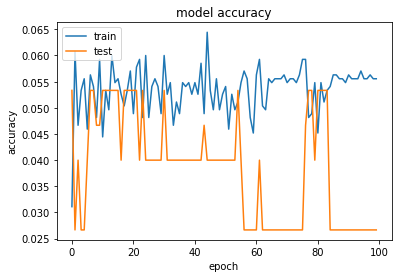

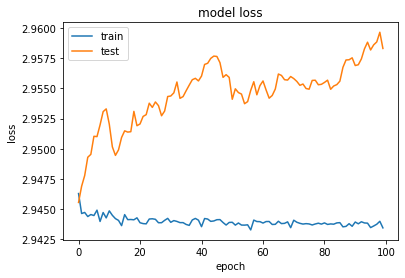

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("model accuracy")
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train','test'], loc= 'upper left')
plt.show()

In [59]:
score = model.evaluate(X_test,Y_test,verbose=True)
print("Test accuracy is:",score[1])

12/12 [==============================] - 0s 7ms/step - loss: 2.9472 - accuracy: 0.0532
Test accuracy is: 0.05319149047136307


In [60]:
im = cv2.imread("Pictures/tiger.jpg",0)
im = resize(im,(150,150))

In [61]:
np.array([np.array(im).flatten()]).shape

(1, 22500)

In [62]:
np.array(im).flatten().shape

(22500,)

In [63]:
model.predict(np.array([np.array(im).flatten()]))

array([[0.05143916, 0.04827073, 0.05152056, 0.05435732, 0.05496331,
        0.05037356, 0.05013704, 0.05413759, 0.05402287, 0.05220089,
        0.05067858, 0.05442618, 0.05468336, 0.05513443, 0.05435074,
        0.05626812, 0.05008413, 0.05484438, 0.04810702]], dtype=float32)

In [64]:
model.predict_classes(np.array([np.array(im).flatten()]))

C:\Users\Azeem\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([15], dtype=int64)

In [65]:
codeLabel[15]

'Monkey'

In [66]:
model.save("./2021DL.model")

INFO:tensorflow:Assets written to: ./2021DL.model\assets


In [67]:
from tensorflow.keras.models import load_model

In [68]:
loadedModel = load_model("./2021DL.model")

In [70]:
loadedModel.predict_classes(np.array([np.array(im).flatten()]))

array([15], dtype=int64)

In [72]:
loadedModel.predict(np.array([np.array(im).flatten()]))

array([[0.05143916, 0.04827073, 0.05152056, 0.05435732, 0.05496331,
        0.05037356, 0.05013704, 0.05413759, 0.05402287, 0.05220089,
        0.05067858, 0.05442618, 0.05468336, 0.05513443, 0.05435074,
        0.05626812, 0.05008413, 0.05484438, 0.04810702]], dtype=float32)

## with mnist dataset...

In [74]:
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import SGD,Adam,RMSprop
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from skimage.io import imread
from skimage.transform import resize

from sklearn.model_selection import train_test_split

In [86]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [102]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [89]:
print(x_train.shape)

(60000, 28, 28)


In [95]:
x_test.shape

(10000, 28, 28)

In [96]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [97]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [100]:
x_train /= 255
x_test /= 255

In [103]:
y_train = to_categorical(y_train,len(set(y)))
y_test = to_categorical(y_test,len(set(y)))

In [107]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.], dtype=float32)

In [110]:
model = Sequential()
model.add(Dense(64,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(len(set(y))))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',optimizer=SGD(),metrics=['accuracy'])

In [111]:
history = model.fit(x_train,y_train,batch_size=64,epochs=30,verbose=True,validation_split=0.1)

Epoch 1/30
844/844 [==============================] - 2s 3ms/step - loss: 1.7689 - accuracy: 0.5313 - val_loss: 0.4341 - val_accuracy: 0.8935
Epoch 2/30
844/844 [==============================] - 2s 2ms/step - loss: 0.4530 - accuracy: 0.8758 - val_loss: 0.3063 - val_accuracy: 0.9167
Epoch 3/30
844/844 [==============================] - 2s 2ms/step - loss: 0.3517 - accuracy: 0.8992 - val_loss: 0.2656 - val_accuracy: 0.9248
Epoch 4/30
844/844 [==============================] - 2s 2ms/step - loss: 0.3072 - accuracy: 0.9126 - val_loss: 0.2416 - val_accuracy: 0.9325
Epoch 5/30
844/844 [==============================] - 2s 2ms/step - loss: 0.2876 - accuracy: 0.9188 - val_loss: 0.2231 - val_accuracy: 0.9362
Epoch 6/30
844/844 [==============================] - 2s 2ms/step - loss: 0.2652 - accuracy: 0.9223 - val_loss: 0.2128 - val_accuracy: 0.9398
Epoch 7/30
844/844 [==============================] - 2s 2ms/step - loss: 0.2448 - accuracy: 0.9312 - val_loss: 0.1984 - val_accuracy: 0.9428
Epoch 

In [112]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                50240     
_________________________________________________________________
activation_14 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
activation_15 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 19)                1235      
_________________________________________________________________
activation_16 (Activation)   (None, 19)                0         
Total params: 55,635
Trainable params: 55,635
Non-trainable params: 0
__________________________________________________

In [113]:
score = model.evaluate(x_test,y_test,verbose=True)
print("Test accuracy is:",score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.1173 - accuracy: 0.9630
Test accuracy is: 0.9629999995231628


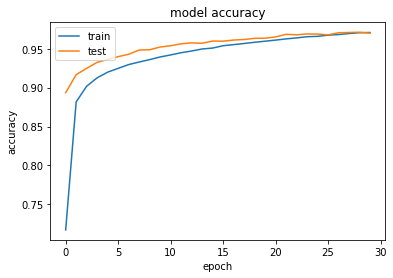

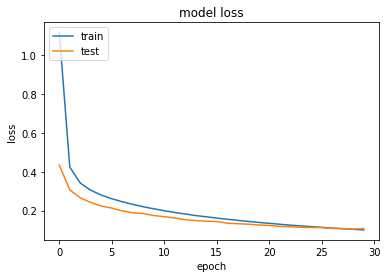

In [115]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [132]:
image = cv2.imread("F:/github/Machine_learning-master/Deep_Learning/second.png",0)
image = resize(image,(28,28))

In [133]:
cv2.imshow("image",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [134]:
np.array([np.array(image).flatten()]).shape

(1, 784)

In [135]:
np.array(image).flatten().shape

(784,)

In [136]:
model.predict(np.array([np.array(image).flatten()]))

array([[1.9115558e-07, 1.5864123e-07, 2.8925965e-07, 9.5379400e-01,
        8.2332933e-17, 4.6201948e-02, 3.6527743e-11, 2.2249853e-14,
        3.2877138e-06, 4.9671550e-10, 1.1054855e-12, 3.1395594e-17,
        5.6514335e-15, 2.6625130e-13, 7.6330740e-14, 1.1694340e-14,
        3.5103085e-14, 9.0785574e-16, 3.1356484e-15]], dtype=float32)

In [137]:
model.predict_classes(np.array([np.array(image).flatten()]))

C:\Users\Azeem\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([3], dtype=int64)

## CNN

In [91]:
from tensorflow.keras.layers import Dense,Activation,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import SGD,Adam,RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

import numpy as np
import os
import cv2
from skimage.io import imread
from skimage.transform import resize

from sklearn.model_selection import train_test_split

In [92]:
data_path = "F:/ck+48/CK+48/"
os.listdir(data_path)

['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']

In [93]:
codeLabel = {'anger': 0,
             'contempt': 1, 
             'disgust': 2, 
             'fear': 3, 
             'happy': 4, 
             'sadness': 5,
             'surprise': 6}
labelCode = dict((k,v) for v,k in codeLabel.items())

In [94]:
def resize_all(src,width=96,height=96):
    data = dict()
    data['label'] = []
    data['data'] = []
    temp={}
    i = 0
    for subdir in os.listdir(src):
        current_path = os.path.join(src,subdir)
        for file in os.listdir(current_path):
            if file[-3:] in {"jpg","png"}:
                image = cv2.imread(os.path.join(current_path,file),0)
                image = resize(image,(width,height))
                label = subdir
                if label not in temp:
                    temp[label] = i
                    i += 1
                data['label'].append(codeLabel[label])
                data['data'].append(image)
    print(temp) 
    return data

In [95]:
data = resize_all(src=data_path)

{'anger': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'sadness': 5, 'surprise': 6}


In [96]:
X = np.array(data['data'])
Y = np.array(data['label'])

In [97]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [98]:
X.shape

(981, 96, 96)

In [99]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

Y_train = to_categorical(Y_train,len(set(Y)))
Y_test = to_categorical (Y_test,len(set(Y)))

In [100]:
X_train.shape

(784, 96, 96)

In [101]:
model = Sequential()
model.add(Conv2D(20, kernel_size=5,padding="same",input_shape = (96,96,1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(50,kernel_size=5,padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

model.add(Dense(len(set(Y))))
model.add(Activation("softmax"))

In [102]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

In [103]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 96, 96, 20)        520       
_________________________________________________________________
activation_8 (Activation)    (None, 96, 96, 20)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 20)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 48, 48, 50)        25050     
_________________________________________________________________
activation_9 (Activation)    (None, 48, 48, 50)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 50)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 28800)            

In [104]:
X_train = X_train[:, :, :, np.newaxis]
X_test = X_test[:, :, :, np.newaxis]

In [105]:
X_train.shape

(784, 96, 96, 1)

In [106]:
history = model.fit(X_train,Y_train,batch_size=64,epochs=30,verbose=1,validation_split=0.1)

Epoch 1/30
12/12 [==============================] - 8s 660ms/step - loss: 2.2278 - accuracy: 0.1944 - val_loss: 1.7779 - val_accuracy: 0.4177
Epoch 2/30
12/12 [==============================] - 8s 639ms/step - loss: 1.6496 - accuracy: 0.4183 - val_loss: 1.6492 - val_accuracy: 0.5190
Epoch 3/30
12/12 [==============================] - 9s 726ms/step - loss: 1.2984 - accuracy: 0.5659 - val_loss: 0.9943 - val_accuracy: 0.6329
Epoch 4/30
12/12 [==============================] - 9s 729ms/step - loss: 0.8462 - accuracy: 0.7049 - val_loss: 1.0586 - val_accuracy: 0.5949
Epoch 5/30
12/12 [==============================] - 9s 767ms/step - loss: 0.6767 - accuracy: 0.7494 - val_loss: 0.6018 - val_accuracy: 0.8101
Epoch 6/30
12/12 [==============================] - 8s 699ms/step - loss: 0.3520 - accuracy: 0.8854 - val_loss: 0.3219 - val_accuracy: 0.8734
Epoch 7/30
12/12 [==============================] - 9s 735ms/step - loss: 0.1934 - accuracy: 0.9426 - val_loss: 0.1730 - val_accuracy: 0.9367
Epoch 

In [129]:
score = model.evaluate(X_test,Y_test,verbose=1)
print("accuracy is:",score[1])

7/7 [==============================] - 1s 97ms/step - loss: 0.0746 - accuracy: 0.9645
accuracy is: 0.9644669890403748


In [186]:
img = cv2.imread("Pictures/anger.jpg",0)

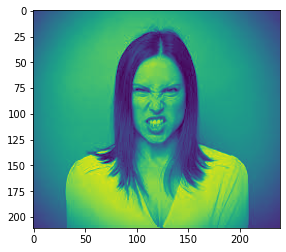

In [187]:
plt.imshow(img)
plt.show()

In [188]:
img = resize(img,(96,96))

In [189]:
img = img.astype('float32')

In [190]:
img.shape

(96, 96)

In [191]:
testImg = img[np.newaxis,:, :,np.newaxis]

In [192]:
testImg.shape

(1, 96, 96, 1)

In [193]:
model.predict([[testImg]])

array([[3.2689684e-11, 1.3952238e-04, 9.9938738e-01, 2.7967241e-07,
        4.7286609e-04, 5.2406079e-09, 1.2576595e-09]], dtype=float32)

In [194]:
model.predict_classes([[testImg]])

C:\Users\Azeem\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([2], dtype=int64)

In [195]:
labelCode[2]

'disgust'

In [196]:
model.predict([[testImg]])[0][2]

0.9993874

## RNN

In [1]:
import numpy as np
from tensorflow.keras.layers import Activation,Dense,SimpleRNN
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.utils import to_categorical
import os
from sklearn.model_selection import train_test_split

In [2]:
file = open("F:/github/Machine_learning-master/Deep_Learning/11.txt","rb")
lines = []
for line in file:
    line = line.strip().lower()
    line = line.decode("ascii","ignore")
    if len(line) == 0:
        continue
    lines.append(line)
file.close()

text = " ".join(lines)

In [3]:
text

'project gutenbergs alices adventures in wonderland, by lewis carroll this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.  you may copy it, give it away or re-use it under the terms of the project gutenberg license included with this ebook or online at www.gutenberg.org title: alices adventures in wonderland author: lewis carroll posting date: june 25, 2008 [ebook #11] release date: march, 1994 last updated: october 6, 2016 language: english character set encoding: utf-8 *** start of this project gutenberg ebook alices adventures in wonderland *** alices adventures in wonderland lewis carroll the millennium fulcrum edition 3.0 chapter i. down the rabbit-hole alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, and what is the use of a book, thought alice without pictures or c

In [4]:
chars = set(text)
nb_chars = len(chars)

In [5]:
nb_chars

55

In [6]:
char2index = dict((c,i) for i,c in enumerate(chars))
index2char = dict((i,c) for i,c in enumerate(chars))

In [13]:
char2index['p']

1

In [7]:
SEQLEN = 10 #optimum value is 10 to 20 for RNN
STEP = 1
input_chars = []
label_chars = []

for i in range(0,len(text)-SEQLEN,STEP):
    input_chars.append(text[i:i+SEQLEN])
    label_chars.append(text[i+SEQLEN])


In [8]:
input_chars[:5]

['project gu', 'roject gut', 'oject gute', 'ject guten', 'ect gutenb']

In [9]:
label_chars[:5]

['t', 'e', 'n', 'b', 'e']

In [10]:
len(input_chars)

158773

In [11]:
158773 x 10 x 55

SyntaxError: invalid syntax (<ipython-input-11-b68dda100788>, line 1)

In [12]:
char2index['p']

1

In [14]:
X = np.zeros((len(input_chars),SEQLEN,nb_chars),dtype=np.bool) #158773 x 10 x 55
Y = np.zeros((len(input_chars),nb_chars),dtype=np.bool)

In [15]:
for i,input_char in enumerate(input_chars): #0->project gu
    for j,ch in enumerate(input_char): #0->p, 1->r
        X[i,j,char2index[ch]] = 1
        Y[i,char2index[label_chars[i]]] = 1

In [16]:
X[0]

array([[False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, Fa

In [17]:
model = Sequential()
model.add(SimpleRNN(128, return_sequences=False, input_shape=(SEQLEN,nb_chars),unroll=True))
model.add(Dense(nb_chars))
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy",optimizer="rmsprop")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 128)               23552     
_________________________________________________________________
dense (Dense)                (None, 55)                7095      
_________________________________________________________________
activation (Activation)      (None, 55)                0         
Total params: 30,647
Trainable params: 30,647
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X,Y,batch_size=128,epochs=30)

Epoch 1/30
1241/1241 [==============================] - 7s 5ms/step - loss: 2.5844
Epoch 2/30
1241/1241 [==============================] - 6s 5ms/step - loss: 2.0699
Epoch 3/30
1241/1241 [==============================] - 6s 5ms/step - loss: 1.9628
Epoch 4/30
1241/1241 [==============================] - 6s 5ms/step - loss: 1.8832
Epoch 5/30
1241/1241 [==============================] - 6s 5ms/step - loss: 1.8158
Epoch 6/30
1241/1241 [==============================] - 6s 5ms/step - loss: 1.7588
Epoch 7/30
1241/1241 [==============================] - 7s 5ms/step - loss: 1.7111
Epoch 8/30
1241/1241 [==============================] - 7s 5ms/step - loss: 1.6677
Epoch 9/30
1241/1241 [==============================] - 6s 5ms/step - loss: 1.6289
Epoch 10/30
1241/1241 [==============================] - 7s 5ms/step - loss: 1.6007
Epoch 11/30
1241/1241 [==============================] - 7s 6ms/step - loss: 1.5738
Epoch 12/30
1241/1241 [==============================] - 7s 5ms/step - loss: 1.5444
E

In [19]:
test_chars = "alice hate"
print("Generating from seed:%s"%(test_chars))
print(test_chars,end="")
org = "alice hate"

Generating from seed:alice hate
alice hate

In [20]:
for i in range(100):
    X_test = np.zeros((1,SEQLEN,nb_chars))
    for i ,ch in enumerate(test_chars):
        X_test[0,i,char2index[ch]] = 1
    pred = model.predict(X_test,verbose=0)[0]
    ypred = index2char[np.argmax(pred)]
    print(ypred,end="")
    org +=ypred
    # move forward with test_chars + ypred
    test_chars = test_chars[1:] + ypred
print(test_chars)

r to look at the exicutions conting of the court of the retcome with the rething of the court of theurt of the


In [21]:
org

'alice hater to look at the exicutions conting of the court of the retcome with the rething of the court of the'

## LSTM

In [1]:
import numpy as np
from tensorflow.keras.layers import Activation,Dense,LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop,Adam,SGD
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

In [2]:
file = open("F:/github/Machine_learning-master/Deep_Learning/11.txt",'rb')
lines = []
for line in file:
    line = line.strip().lower()
    line = line.decode("ascii","ignore")
    if len(line) == 0:
        continue
    lines.append(line)
file.close()
text = " ".join(lines)

In [3]:
text

'project gutenbergs alices adventures in wonderland, by lewis carroll this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.  you may copy it, give it away or re-use it under the terms of the project gutenberg license included with this ebook or online at www.gutenberg.org title: alices adventures in wonderland author: lewis carroll posting date: june 25, 2008 [ebook #11] release date: march, 1994 last updated: october 6, 2016 language: english character set encoding: utf-8 *** start of this project gutenberg ebook alices adventures in wonderland *** alices adventures in wonderland lewis carroll the millennium fulcrum edition 3.0 chapter i. down the rabbit-hole alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, and what is the use of a book, thought alice without pictures or c

In [4]:
chars = set(text)
nb_chars = len(chars)

In [5]:
char2index = dict((c,i) for i,c in enumerate(chars))
index2char = dict((i,c) for i,c in enumerate(chars))

In [6]:
SEQLEN = 10
STEP = 1
input_chars = []
label_chars = []
for i in range(0,len(text)-SEQLEN,STEP):
    input_chars.append(text[i:i+SEQLEN])
    label_chars.append(text[i+SEQLEN])

In [7]:
input_chars[:5]

['project gu', 'roject gut', 'oject gute', 'ject guten', 'ect gutenb']

In [8]:
label_chars[:5]

['t', 'e', 'n', 'b', 'e']

In [9]:
len(input_chars)

158773

In [10]:
x = np.zeros((len(input_chars),SEQLEN,nb_chars),dtype = np.bool)
y = np.zeros((len(input_chars),nb_chars),dtype = np.bool)

In [14]:
x.shape

(158773, 10, 55)

In [15]:
for i,input_char in enumerate(input_chars): #0->project gu
    for j,ch in enumerate(input_char): #0-> p ,1->r
        x[i,j,char2index[ch]] = 1
        y[i,char2index[label_chars[i]]] = 1

In [17]:
model = Sequential()
model.add(LSTM(128,return_sequences = False,input_shape=(SEQLEN,nb_chars),unroll = True))
model.add(Dense(nb_chars))
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy",optimizer="rmsprop")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               94208     
_________________________________________________________________
dense (Dense)                (None, 55)                7095      
_________________________________________________________________
activation (Activation)      (None, 55)                0         
Total params: 101,303
Trainable params: 101,303
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(x,y,batch_size=128,epochs=30)

Epoch 1/30
1241/1241 [==============================] - 18s 13ms/step - loss: 2.7174
Epoch 2/30
1241/1241 [==============================] - 17s 14ms/step - loss: 2.0903
Epoch 3/30
1241/1241 [==============================] - 18s 15ms/step - loss: 1.8769
Epoch 4/30
1241/1241 [==============================] - 19s 15ms/step - loss: 1.7319
Epoch 5/30
1241/1241 [==============================] - 17s 14ms/step - loss: 1.6371
Epoch 6/30
1241/1241 [==============================] - 20s 16ms/step - loss: 1.5575
Epoch 7/30
1241/1241 [==============================] - 19s 15ms/step - loss: 1.4982
Epoch 8/30
1241/1241 [==============================] - 19s 15ms/step - loss: 1.4458
Epoch 9/30
1241/1241 [==============================] - 18s 15ms/step - loss: 1.3987 0s - loss: 1.
Epoch 10/30
1241/1241 [==============================] - 20s 16ms/step - loss: 1.3643
Epoch 11/30
1241/1241 [==============================] - 19s 16ms/step - loss: 1.3276
Epoch 12/30
1241/1241 [==========================

In [20]:
test_chars = "alice hate"
print("Generating from seed: %s"%test_chars)
print(test_chars,end=" ")
org = "alice hate"

Generating from seed: alice hate
alice hate 

In [23]:
for i in range(100):
    x_test = np.zeros((1,SEQLEN,nb_chars))
    for i,ch in enumerate(test_chars):
        x_test[0,i,char2index[ch]] = 1
    pred = model.predict(x_test,verbose=0)[0]
    ypred = index2char[np.argmax(pred)]
    print(ypred,end="")
    org += ypred
    #move forward with test_chars + ypred
    test_chars = test_chars[1:] + ypred
print(test_chars)

look of the garden with a sigh: it was a large party caterpillar. it must be whisters of the look ofhe look of


In [24]:
org

'alice hate in the words down the chimney, and there was a large party caterpillar. it must be whisters of the look of the garden with a sigh: it was a large party caterpillar. it must be whisters of the look of'